<a href="https://colab.research.google.com/github/Ava100rav/gemstone-price-prediction/blob/main/gem_by_saurav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np   
import pandas as pd    
import seaborn as sns

import matplotlib.pyplot as plt   
import matplotlib.style

In [4]:
df=pd.read_csv('/content/drive/MyDrive/gemstone-price-prediction/cubic_zirconia.csv')

In [5]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [6]:
df.shape

(26967, 11)

In [7]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


Observation-1:
1. This data set contains 26967 rows, 11 columns .
2. In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predictor(independent) variable.
3. The first column is an index ("Unnamed: 0")as  serial no of no use, we can remove it.
4. Exept depth, in all the column non null count is 26967.so null values present only in depth column

In [10]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [11]:
df.shape

(26967, 10)

In [12]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [14]:
df[df['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [15]:
df.drop(df.index[[5821,6215,17506]],axis=0,inplace=True)

In [16]:
(df.y==0).sum()

0

In [17]:
df[df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [18]:
l1=df[df['z']==0].index
l1

Int64Index([6034, 10827, 12498, 12689, 18194, 23758], dtype='int64')

In [19]:
df.drop(l1,axis=0,inplace=True)

In [20]:
(df.depth==0).sum()

0

In [21]:
df.shape

(26958, 10)

In [22]:
dup=df.duplicated()
dup.sum()

33

In [23]:
df.drop_duplicates(inplace=True) 
df.shape

(26925, 10)

In [24]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [25]:
df['depth'].median()

61.8

In [26]:
df = df.fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [27]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


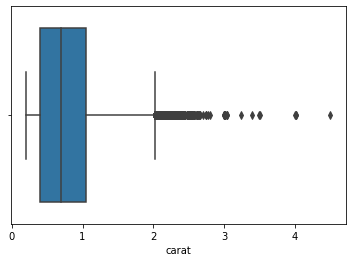

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


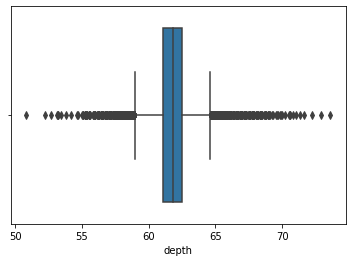

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


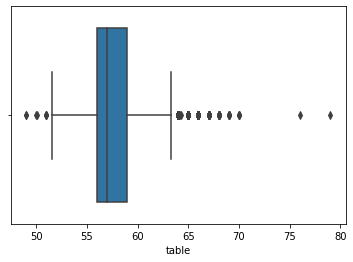

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


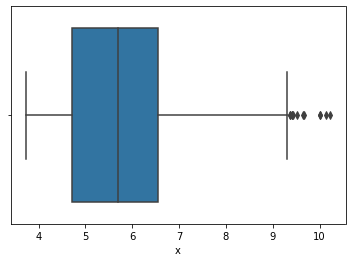

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


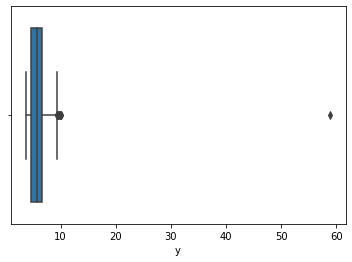

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


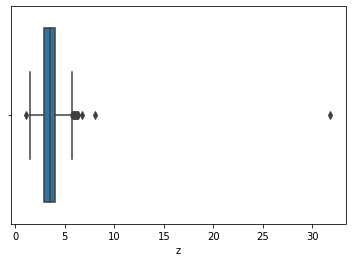

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


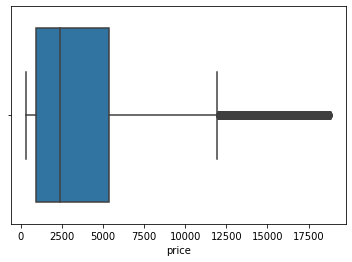

In [28]:
cols = ['carat','depth', 'table', 'x', 'y', 'z','price' ]
for i in cols:
    sns.boxplot(df[i])
    plt.show();

In [29]:
df2 = df
df2.shape

(26925, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


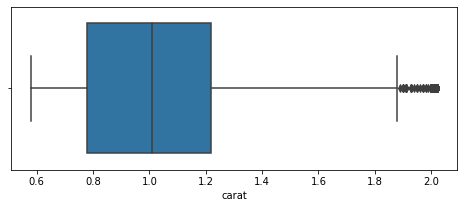

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


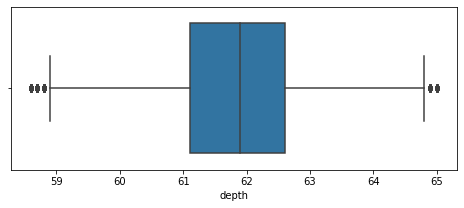

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


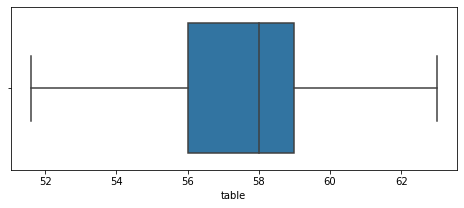

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


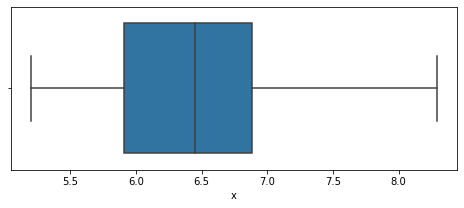

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


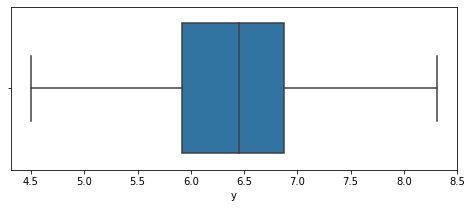

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


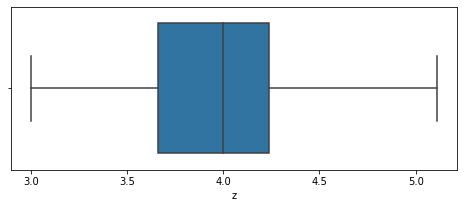

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


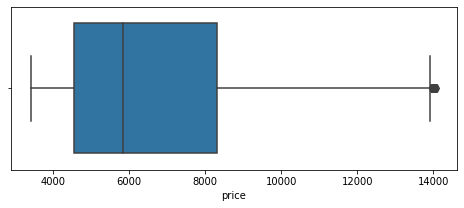

In [30]:


for i in cols:
  q1 = np.percentile(df[i], 25)
  q3 = np.percentile(df[i], 75)

  iqr = q3 -q1
  lower = np.abs(q1 - (1.5 * iqr))
  upper = np.abs(q3 + (1.5 * iqr))
  #print(lower, upper)
  df1 = df[(df[i] > upper) | (df[i] < lower)]
  indexs = df1.index
  df2.drop(indexs, axis = 0, inplace = True)
  plt.figure(figsize = (8,3))
  sns.boxplot(df2[i])
  plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


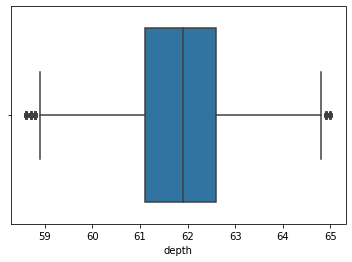

In [31]:
sns.boxplot(df2['depth'])
plt.show()

In [32]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
11,1.10,Premium,D,SI1,60.7,55.0,6.74,6.71,4.08,6468
17,1.01,Ideal,D,VS2,59.8,56.0,6.52,6.49,3.89,7127


In [33]:
df2.describe()

,carat,depth,table,x,y,z,price
count,8965.000000,8965.000000,8965.000000,8965.000000,8965.000000,8965.000000,8965.000000
mean,1.170126,61.837323,57.713731,6.715074,6.713566,4.151028,6673.248076
std,0.258430,1.186560,1.999243,0.484746,0.477465,0.296925,2661.554544
min,0.580000,58.600000,51.600000,5.340000,5.360000,3.290000,3414.000000
25%,1.010000,61.100000,56.000000,6.390000,6.390000,3.960000,4544.000000
50%,1.090000,61.900000,58.000000,6.620000,6.620000,4.080000,5844.000000
75%,1.280000,62.600000,59.000000,6.990000,6.980000,4.300000,8299.000000
max,2.020000,65.000000,63.000000,8.290000,8.310000,5.110000,14092.000000


In [34]:
df2.cut.value_counts()

Ideal        2978
Premium      2770
Very Good    2253
Good          852
Fair          112
Name: cut, dtype: int64

In [35]:
df2['cut']=df2['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})

In [36]:
df2.color.value_counts()

G    1927
H    1701
F    1488
E    1185
I    1115
D     909
J     640
Name: color, dtype: int64

In [37]:
df2['color']=df2['color'].map({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})

In [38]:
df2.clarity.value_counts()

SI1     2521
SI2     2186
VS2     1934
VS1     1228
VVS2     573
VVS1     275
IF       124
I1       124
Name: clarity, dtype: int64

In [39]:
df2['clarity']=df2['clarity'].map({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})

In [40]:
df2.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289
5,1.02,4,6,3,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,1,2,2,63.7,60.0,6.35,6.30,4.03,4836
11,1.10,3,6,2,60.7,55.0,6.74,6.71,4.08,6468
17,1.01,4,6,3,59.8,56.0,6.52,6.49,3.89,7127
20,1.04,3,6,5,61.1,60.0,6.54,6.51,3.99,10984
22,1.52,4,6,1,62.7,56.0,7.35,7.28,4.59,8631
23,1.19,4,0,1,61.7,56.0,6.80,6.85,4.21,4508
25,1.50,3,2,1,61.4,62.0,7.40,7.25,4.49,7187
30,1.19,4,3,2,62.3,55.0,6.76,6.81,4.23,6335


In [41]:
df2.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [42]:
# converting the'cut','color','clarity' column from object / string type to float.

df2['cut'] = df2['cut'].astype('float64')
df2['color'] = df2['color'].astype('float64')
df2['clarity'] = df2['clarity'].astype('float64')

In [43]:
df2.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

Train-Test split

In [44]:
# Copy all the predictor variables into X dataframe
X = df2.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df2[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
5,1.02,4.0,6.0,3.0,61.5,56.0,6.46,6.49,3.99
6,1.01,1.0,2.0,2.0,63.7,60.0,6.35,6.30,4.03
11,1.10,3.0,6.0,2.0,60.7,55.0,6.74,6.71,4.08
17,1.01,4.0,6.0,3.0,59.8,56.0,6.52,6.49,3.89


In [45]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression

# Split X and y into training and test set in 65:35 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35 , random_state=10)
# invoke the LinearRegression function and find the bestfit model on training data


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [46]:
regression_model.score(X_train, y_train)

0.8634153655184973

In [47]:
regression_model.score(X_test, y_test)

0.8664860631221225

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=25)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [49]:
dtree.score(X_train, y_train)

0.9999952170793875

In [50]:
dtree.score(X_test, y_test)

0.8791268300691774

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
m = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
m.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9443837572883743

In [52]:
m.score(X_test, y_test)

0.9357520050947505